In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
import os



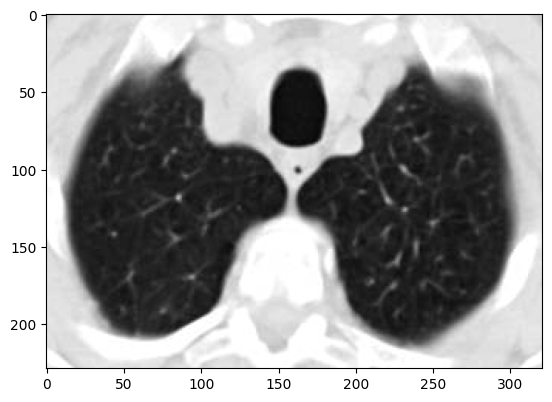

In [3]:
DATAPATH = '../Covid-19-Prediction/Covid_Dataset'

CATEGORIES = ['NORMAL', 'COVID']

for category in CATEGORIES:
    path = os.path.join(DATAPATH, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        
        break
        
    break
        
        

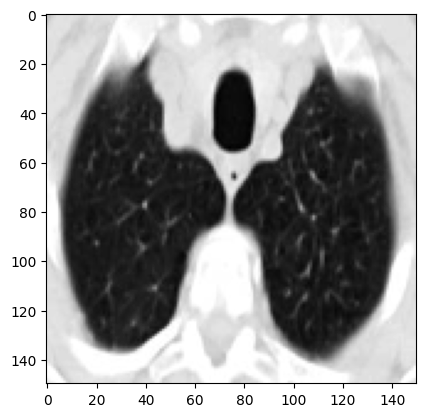

In [4]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATAPATH, category)
        class_num = CATEGORIES.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            

create_training_data()
print(len(training_data))
                
        
        

100%|█████████████████████████████████████████████████████████████████████████████| 1252/1252 [00:07<00:00, 176.40it/s]

2481


In [6]:
import random
random.shuffle(training_data)


In [7]:
#it only has 0 for features (sample[0]) and 1 for labels (sample[1])
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
0
0
1
1
1
0


In [16]:
X = []
y = []

for featrues, labels in training_data:
    X.append(featrues)
    y.append(labels)
    
    
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
X = X/255.0

[[[[235]
   [233]
   [235]
   ...
   [238]
   [239]
   [241]]

  [[234]
   [229]
   [233]
   ...
   [235]
   [234]
   [238]]

  [[234]
   [232]
   [236]
   ...
   [238]
   [236]
   [240]]

  ...

  [[233]
   [231]
   [229]
   ...
   [207]
   [207]
   [201]]

  [[247]
   [224]
   [237]
   ...
   [202]
   [207]
   [207]]

  [[209]
   [247]
   [239]
   ...
   [202]
   [223]
   [234]]]]


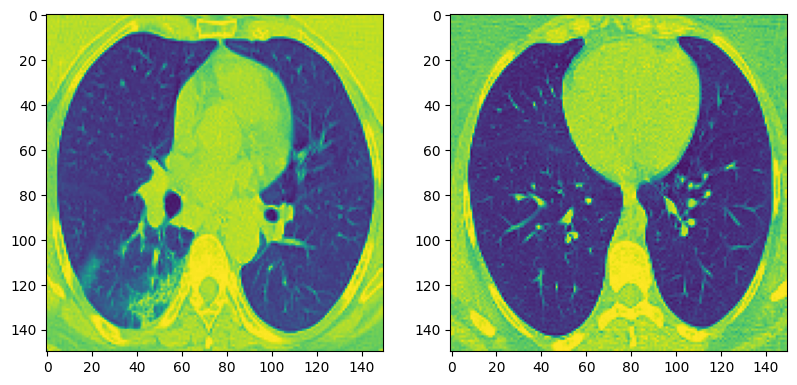

In [20]:

plt.figure(figsize=(20,10))
plt.subplot(141)
plt.imshow(X[0])
plt.subplot(142)
plt.imshow(X[1])
plt.show()

In [5]:
import h5py

In [6]:
f = h5py.File('FPN-fold1(1).hdf5', 'r')

In [8]:
list(f.keys())

['model_weights', 'optimizer_weights']

In [37]:
f = h5py.File('FPN-fold1(1).hdf5', 'r')
data = f['model_weights']

In [38]:
for key in f.keys():
    print(key)

model_weights
optimizer_weights


In [39]:
f['model_weights']

<HDF5 group "/model_weights" (220 members)>

In [40]:
data = f['optimizer_weights']
data

<HDF5 group "/optimizer_weights" (401 members)>

In [42]:
np.array(data)

array(['Nadam', 'm_0:0', 'm_100:0', 'm_101:0', 'm_102:0', 'm_103:0',
       'm_104:0', 'm_105:0', 'm_106:0', 'm_107:0', 'm_108:0', 'm_109:0',
       'm_10:0', 'm_110:0', 'm_111:0', 'm_112:0', 'm_113:0', 'm_114:0',
       'm_115:0', 'm_116:0', 'm_117:0', 'm_118:0', 'm_119:0', 'm_11:0',
       'm_120:0', 'm_121:0', 'm_122:0', 'm_123:0', 'm_124:0', 'm_125:0',
       'm_126:0', 'm_127:0', 'm_128:0', 'm_129:0', 'm_12:0', 'm_130:0',
       'm_131:0', 'm_132:0', 'm_133:0', 'm_134:0', 'm_135:0', 'm_136:0',
       'm_137:0', 'm_138:0', 'm_139:0', 'm_13:0', 'm_140:0', 'm_141:0',
       'm_142:0', 'm_143:0', 'm_144:0', 'm_145:0', 'm_146:0', 'm_147:0',
       'm_148:0', 'm_149:0', 'm_14:0', 'm_150:0', 'm_151:0', 'm_152:0',
       'm_153:0', 'm_154:0', 'm_155:0', 'm_156:0', 'm_157:0', 'm_158:0',
       'm_159:0', 'm_15:0', 'm_160:0', 'm_161:0', 'm_162:0', 'm_163:0',
       'm_164:0', 'm_165:0', 'm_166:0', 'm_167:0', 'm_168:0', 'm_169:0',
       'm_16:0', 'm_170:0', 'm_171:0', 'm_172:0', 'm_173:0', 

In [43]:
print(data['m_104:0'])

<HDF5 dataset "m_104:0": shape (256,), type "<f4">


In [44]:
b = data['m_104:0']